In [1]:
import pandas as pd

kic = pd.read_csv('../KIC.csv')
price = pd.read_csv('../KIC_price.csv')
infra = pd.read_csv('../infra_score.csv')

kic.head(3)

,번호,센터명,주소,클러스터,위도,경도,은행,편의점,지하철 개수,지하철 점수,지하철등급,국도(km),고속도로(km),도로점수,도로등급
0,0,강릉 공공임대형 지식산업센터,강원특별자치도 강릉시 사천면 방동리 805-3,NaN,37.806207,128.854086,E,E,0,0.0,E,0.91,7.81,1.63,A
1,1,동해지식산업센터,강원특별자치도 동해시 구호동 216,NaN,37.481576,129.133811,C,E,0,0.0,E,3.65,6.42,4.65,E
2,2,표준공장1동,강원특별자치도 동해시 구호동 247번지,NaN,37.480842,129.153095,E,E,0,0.0,E,5.65,9.70,7.14,E


In [2]:
price.head(1)

,지역,물건번호,상가구분,월세,보증금,평당월세,계약면적,전용면적,지번주소,위도,...,C_max,전세금(J),P_min,P_max,예상 매매가,단위 면적당 매매가,층,전체층,속한지산이름,클러스터
0,강원특별자치도 원주시 반곡동,2528873558,지식산업센터,40,500.0,1.11,56,36.18,강원특별자치도 원주시 반곡동 1809-11,37.327746,...,6.5,9227.272727,7807.692308,9227.272727,8517.482517,235.419638,8,15,엔터비즈타워,5


In [3]:
infra.head(3)

,center_name,subway_score,bank_score,road_score,infra_score
0,3d프린팅벤처집적지식산업센터,0.723411,0,77.419355,78.142766
1,3d프린팅제조혁신센터,0.000000,20,70.967742,90.967742
2,5071지식산업센터,0.000000,0,57.056452,57.056452


In [4]:
import pandas as pd
import re

price = pd.read_csv('../KIC_price.csv')
infra = pd.read_csv('../infra_score.csv')

# 한글, 숫자, 영어만 남기고 모두 제거 + 소문자로 통일
def clean_text(s):
    return re.sub(r'[^가-힣0-9a-zA-Z]', '', str(s)).lower()

price['지산이름_정제'] = price['속한지산이름'].apply(clean_text)
infra['center_name_정제'] = infra['center_name'].apply(clean_text)

# 정제된 컬럼으로 병합 (대소문자 무시)
merged = price.merge(
    infra,
    left_on='지산이름_정제',
    right_on='center_name_정제',
    how='left'
)

merged.to_csv('지산매물데이터.csv', index=False, encoding='utf-8-sig')
print("병합 완료: 지산매물데이터.csv (한글/숫자/영어만 남기고, 대소문자 무시 매칭)")

병합 완료: 지산매물데이터.csv (한글/숫자/영어만 남기고, 대소문자 무시 매칭)


In [5]:
df = pd.read_csv('지산매물데이터.csv')

# infra_score가 NaN인 행의 개수 출력
print("infra_score가 NaN인 행 개수:", df['infra_score'].isna().sum())
print(len(df))

infra_score가 NaN인 행 개수: 478
19226


In [6]:
df = pd.read_csv('지산매물데이터.csv')

# infra_score가 NaN인 행 제거 후 df 재정의
df = df[df['infra_score'].notna()].reset_index(drop=True)

print("infra_score가 NaN인 행 제거 후 남은 데이터 수:", len(df))

infra_score가 NaN인 행 제거 후 남은 데이터 수: 18748


------------------

K-means

K값별 클러스터링 평가 진행 중...


100%|██████████| 30/30 [02:07<00:00,  4.25s/it]


=== 평가지표별 최적 K값 ===
Silhouette Score 기준 최적 K: 12 (점수: 0.4483)
Calinski-Harabasz Index 기준 최적 K: 39 (점수: 12291.39)
Davies-Bouldin Index 기준 최적 K: 14 (점수: 0.6244)


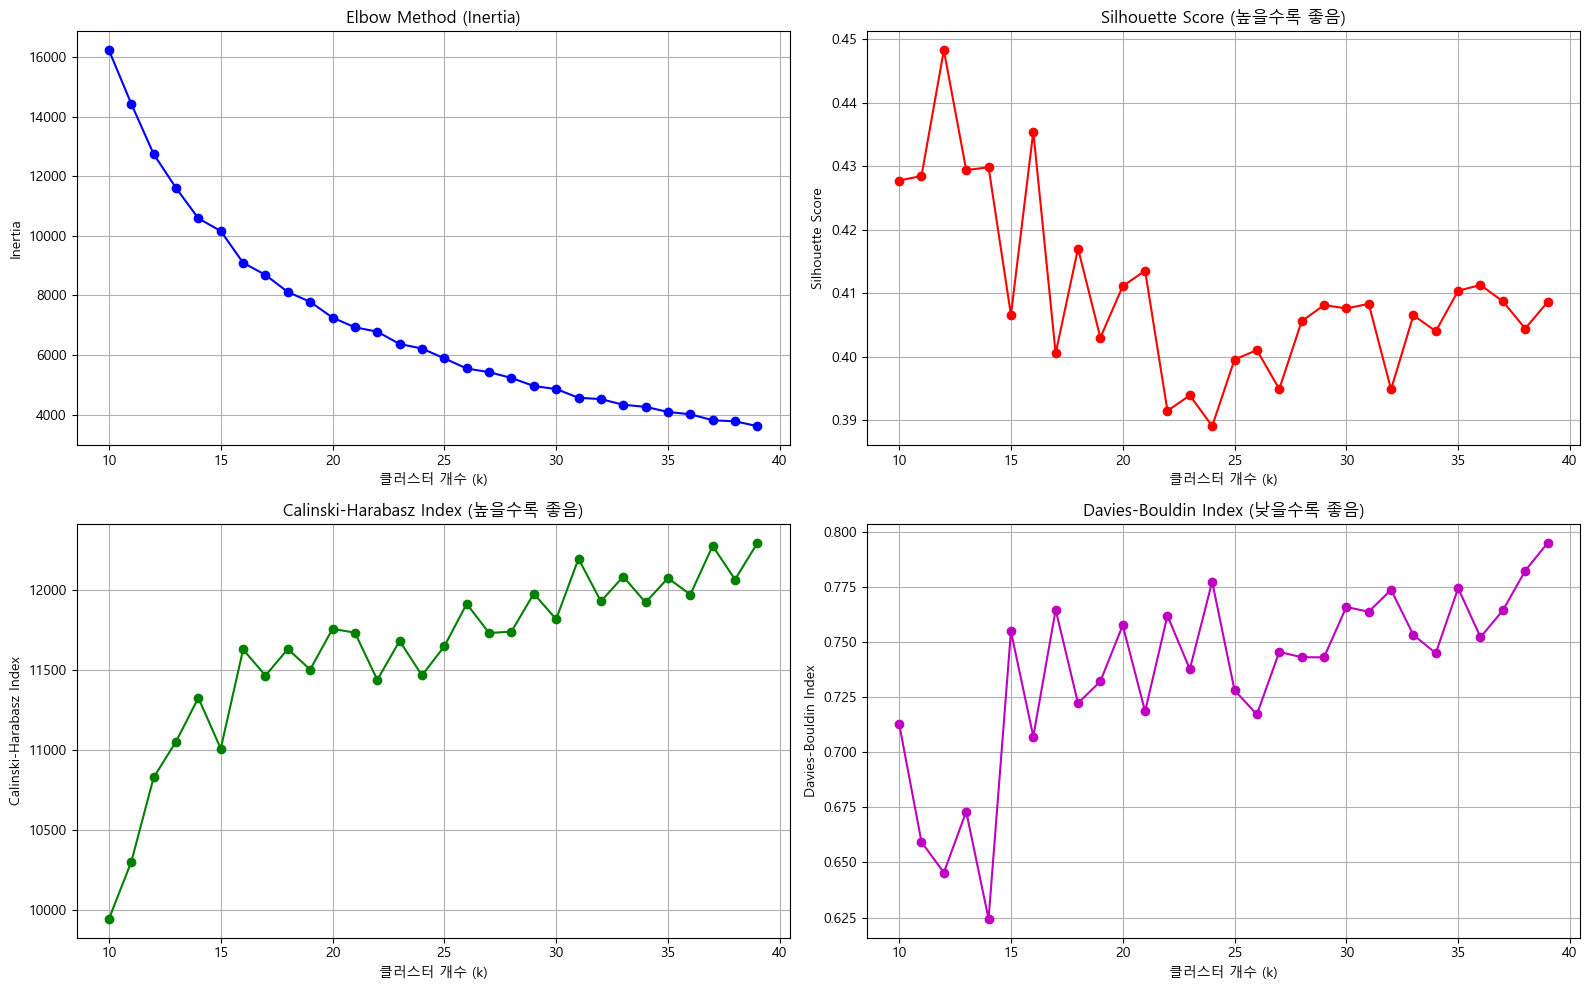

지도 저장 완료: KMeans_cluster_map.html (클러스터 수: 12, FeatureGroup, 회색 배경, 시작시 전체 비활성)

=== 클러스터별 지산 매물 많은 순 (상위 5개) ===

[클러스터 0]
       속한지산이름  매물수
G1비즈캠퍼스지식산업센터  174
백석스타비즈 지식산업센터  142
   SBC비지니스센터   120
       더 플랫폼R  115
  에스타워 지식산업센터   70

[클러스터 1]
             속한지산이름  매물수
금정역 3차 SK V1 center  344
      현대프리미어캠퍼스 지축역  276
         광양프런티어밸리8차  196
    안양 아이에스비즈타워 센트럴  193
          디원시티 시그니처  107

[클러스터 2]
     속한지산이름  매물수
 GL메트로시티 한강  891
현대 테라타워DIMC  530
케이비부동산신탁(주)  168
     META-X  137
     더 콜럼버스  134

[클러스터 3]
            속한지산이름  매물수
         영등포 디스테이트  537
문정 에스케이브이원 지엘메트로시티  210
     시그니처 광교지식산업센터  169
          문정역 테라타워  162
                SK  136

[클러스터 4]
      속한지산이름  매물수
  현대테라타워 DMC  512
    배곧시그니처타워  128
   평택지제센트럴타워  112
 고덕STV지식산업센터   78
고양한강삼송지축듀클래스   74

[클러스터 5]
속한지산이름  매물수
 펜타플렉스    1

[클러스터 6]
        속한지산이름  매물수
     구리갈매 휴벨라인  670
      GIDC 광명역  583
     현대테라타워CMC  320
   영등포 C-TOWER  200
현대지식산업센터 가산퍼블릭  178

[클러스터 7]
           속한지산이름  매물수
      현대 실리콘앨리 동탄  48

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import folium
import matplotlib
from branca.element import Template, MacroElement

# 맥에서 한글 
# plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['axes.unicode_minus'] = False

# 윈도우에서 한글 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False



df = pd.read_csv('지산매물데이터.csv')
df = df[df['infra_score'].notna()].reset_index(drop=True)
df['공용면적'] = df['계약면적'] - df['전용면적']


features = [ '전용면적','subway_score', 'bank_score', 'road_score','단위 면적당 매매가']
features = [col for col in features if col in df.columns]

X = df[features].replace([np.inf, -np.inf], np.nan).fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



#k 찾기 
#------------------------------------------------------------------------------------------------------------
k_range = range(10, 40)
inertias, silhouette_scores, calinski_scores, davies_scores = [], [], [], []

print("K값별 클러스터링 평가 진행 중...")
for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    try:
        silhouette_scores.append(silhouette_score(X_scaled, labels))
    except Exception:
        silhouette_scores.append(np.nan)
    try:
        calinski_scores.append(calinski_harabasz_score(X_scaled, labels))
    except Exception:
        calinski_scores.append(np.nan)
    try:
        davies_scores.append(davies_bouldin_score(X_scaled, labels))
    except Exception:
        davies_scores.append(np.nan)

def safe_best_idx(arr, func):
    arr = np.array(arr)
    if np.all(np.isnan(arr)):
        return None
    return func(arr)

best_k_silhouette = k_range[safe_best_idx(silhouette_scores, np.nanargmax)] if safe_best_idx(silhouette_scores, np.nanargmax) is not None else None
best_k_calinski = k_range[safe_best_idx(calinski_scores, np.nanargmax)] if safe_best_idx(calinski_scores, np.nanargmax) is not None else None
best_k_davies = k_range[safe_best_idx(davies_scores, np.nanargmin)] if safe_best_idx(davies_scores, np.nanargmin) is not None else None

print("=== 평가지표별 최적 K값 ===")
if best_k_silhouette is not None:
    print(f"Silhouette Score 기준 최적 K: {best_k_silhouette} (점수: {np.nanmax(silhouette_scores):.4f})")
if best_k_calinski is not None:
    print(f"Calinski-Harabasz Index 기준 최적 K: {best_k_calinski} (점수: {np.nanmax(calinski_scores):.2f})")
if best_k_davies is not None:
    print(f"Davies-Bouldin Index 기준 최적 K: {best_k_davies} (점수: {np.nanmin(davies_scores):.4f})")

final_k = best_k_silhouette if best_k_silhouette is not None else 15





#클러스터링
#------------------------------------------------------------------------------------------------------------
kmeans = KMeans(n_clusters=final_k, random_state=42, n_init=10)


df['클러스터'] = kmeans.fit_predict(X_scaled)
df.to_csv('지산매물데이터_kemans.csv', index=False, encoding='utf-8-sig')














cmap = plt.get_cmap('tab20', final_k)
colors = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(final_k)]

m = folium.Map(location=[df['위도'].mean(), df['경도'].mean()], zoom_start=11, tiles='CartoDB positron')

cluster_groups = []
for cid in range(final_k):
    group = folium.FeatureGroup(name=f'클러스터 {cid}', show=False)
    subdf = df[df['클러스터'] == cid]
    for _, row in subdf.iterrows():
        folium.CircleMarker(
            location=[row['위도'], row['경도']],
            radius=5,
            color=colors[cid],
            fill=True,
            fill_color=colors[cid],
            fill_opacity=0.7,
            popup=f"클러스터: {cid}<br>센터명: {row.get('센터명', '')}<br>주소: {row.get('주소', '')}<br>면적: {row.get('계약면적', '')}㎡<br>월세: {row.get('월세', '')}"
        ).add_to(group)
    group.add_to(m)
    cluster_groups.append(group)

folium.LayerControl(collapsed=False).add_to(m)

folium.map.Marker(
    [df['위도'].max(), df['경도'].min()],
    icon=folium.DivIcon(html="""
        <div style="font-size: 14pt; color: black; background: white; border: 1px solid gray; padding: 4px;">
            <b>Tip:</b> 오른쪽 상단에서 클러스터를 선택하면<br>
            해당 클러스터의 매물만 지도에 표시됩니다.<br>
            (지도는 회색/흑백 배경, 시작시 전체 비활성)
        </div>
    """)
).add_to(m)

m.save('KMeans_cluster_map.html')
print(f"지도 저장 완료: KMeans_cluster_map.html (클러스터 수: {final_k}, FeatureGroup, 회색 배경, 시작시 전체 비활성)")

if '속한지산이름' in df.columns:
    cluster_gisan = (
        df.groupby('클러스터')['속한지산이름']
        .value_counts()
        .groupby('클러스터')
        .head(5)  # 각 클러스터별 상위 5개
        .reset_index(name='매물수')
    )
    print("\n=== 클러스터별 지산 매물 많은 순 (상위 5개) ===")
    for cid in sorted(df['클러스터'].unique()):
        print(f"\n[클러스터 {cid}]")
        display = cluster_gisan[cluster_gisan['클러스터'] == cid][['속한지산이름', '매물수']]
        print(display.to_string(index=False))
else:
    print("속한지산이름 컬럼이 없습니다.")

-----------